# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Finding null values in the data with datatype of int64 and float64
null_values = ['order_id', 'customer_id', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']
check_null_values = df[null_values].isnull().sum()
print(check_null_values)

# Finding null values in the data with datatype of object
not_given_values = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']
check_not_given_values = (df[not_given_values]=='Not given').sum()
print(check_not_given_values)

if check_not_given_values[:].sum() > 0 :
  df['rating'] = df['rating'].replace('Not given', np.nan)

print('Missing values are treated appropriately')

order_id                 0
customer_id              0
cost_of_the_order        0
food_preparation_time    0
delivery_time            0
dtype: int64
restaurant_name      0
cuisine_type         0
day_of_the_week      0
rating             736
dtype: int64
Missing values are treated appropriately


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Minimum preparation time
print("Minimum preparation time is", df['food_preparation_time'].min())
# Average prepatation time
print("Average preparation time is", df['food_preparation_time'].mean())
# Maximum preparation time
print("Maximum preparation time is", df['food_preparation_time'].max())

Minimum preparation time is 20
Average preparation time is 27.371970495258168
Maximum preparation time is 35


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
(df['rating'].isnull()).sum()

736

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

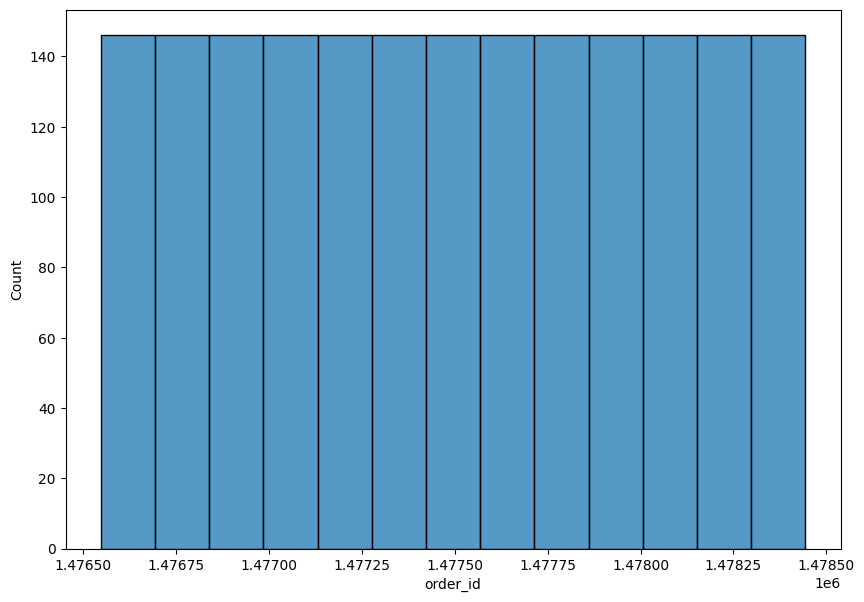

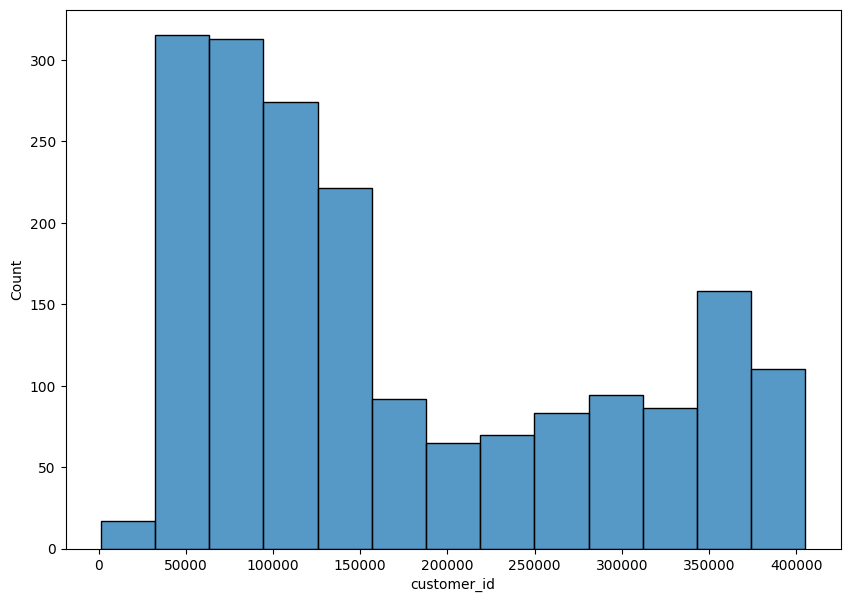

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


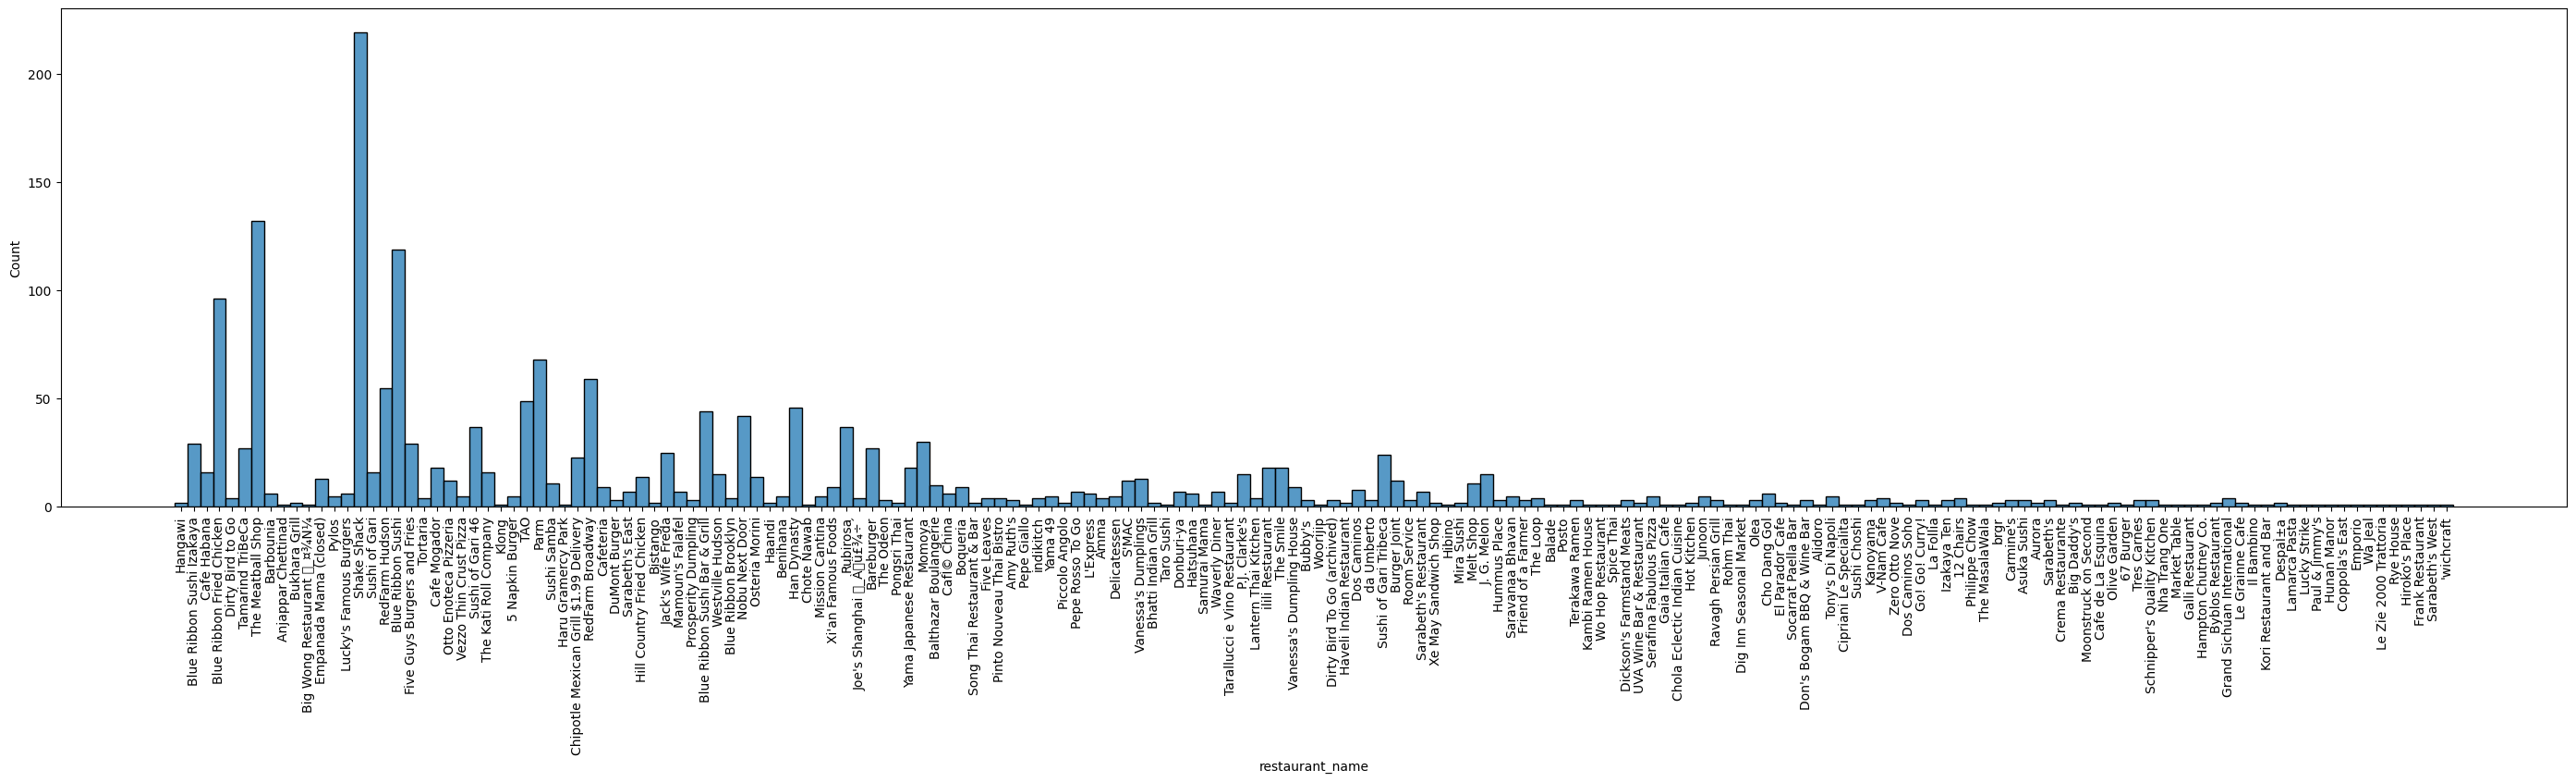

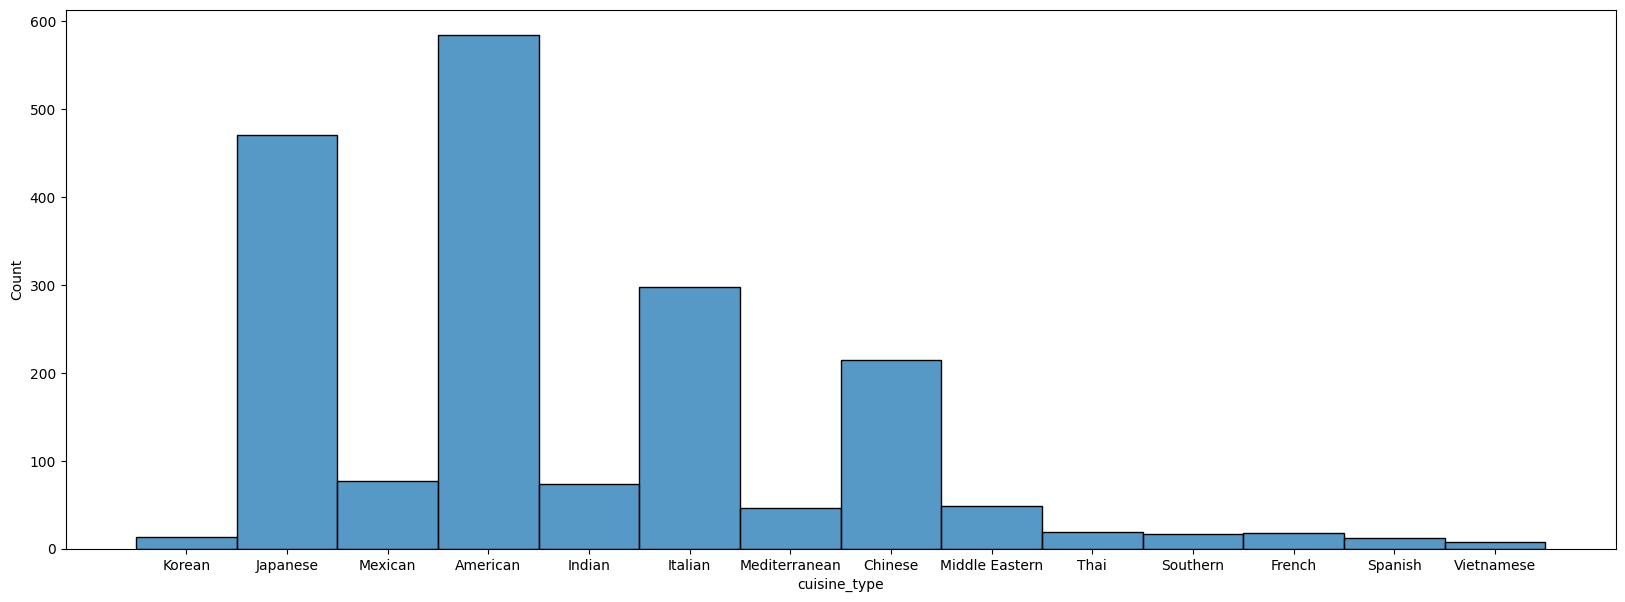

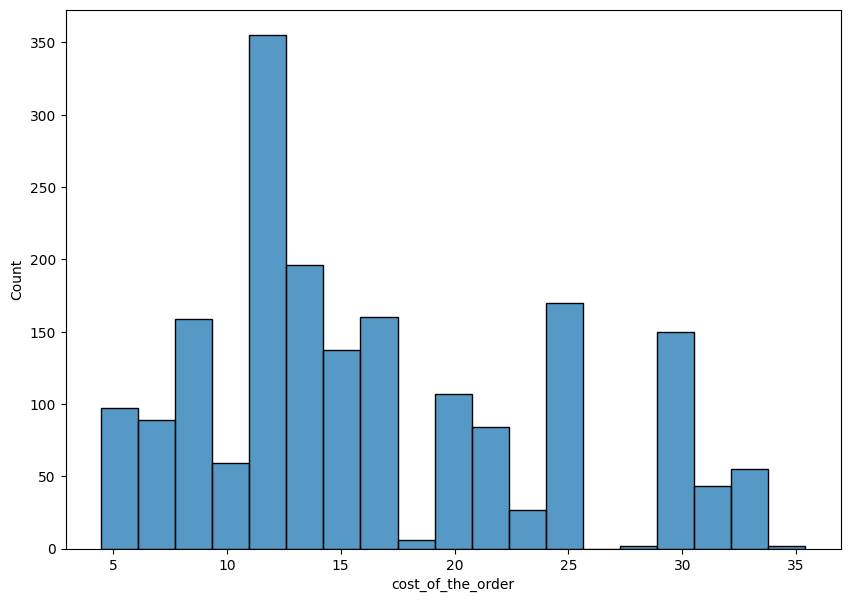

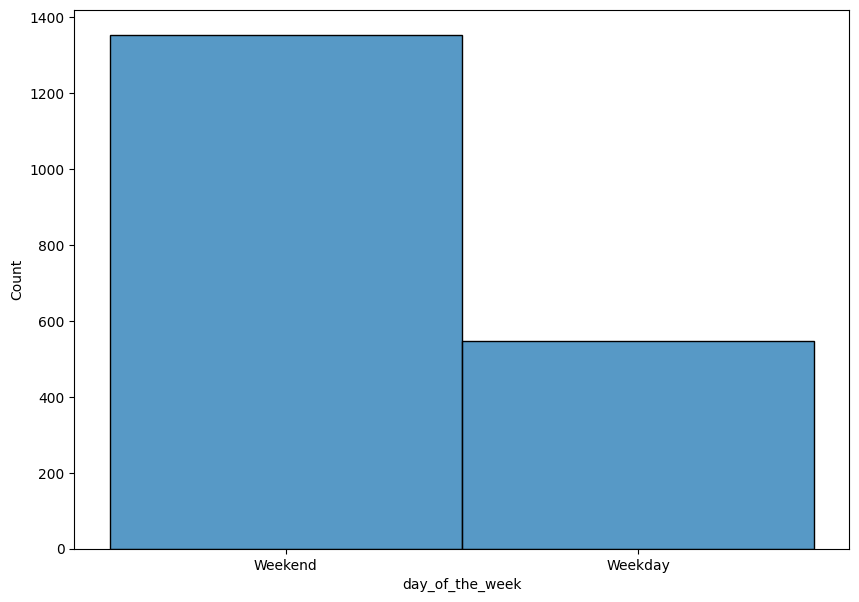

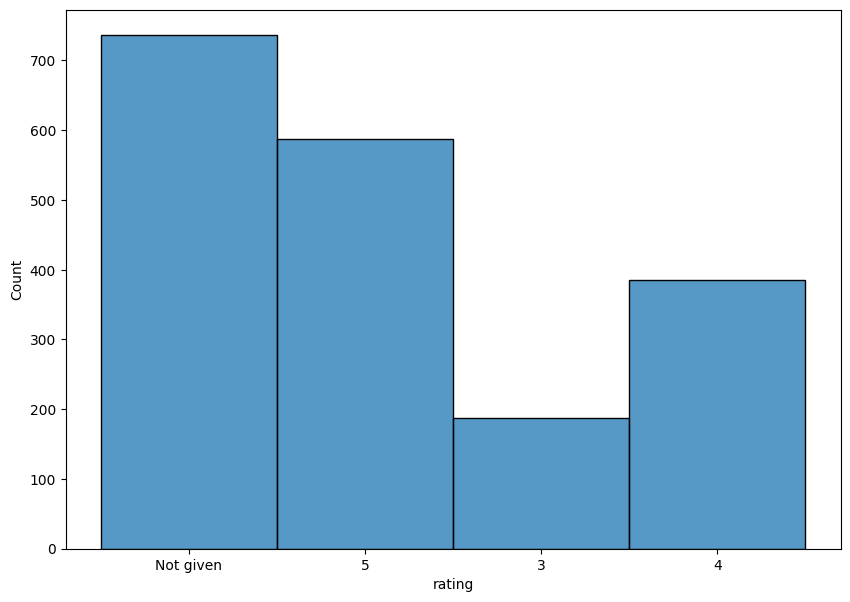

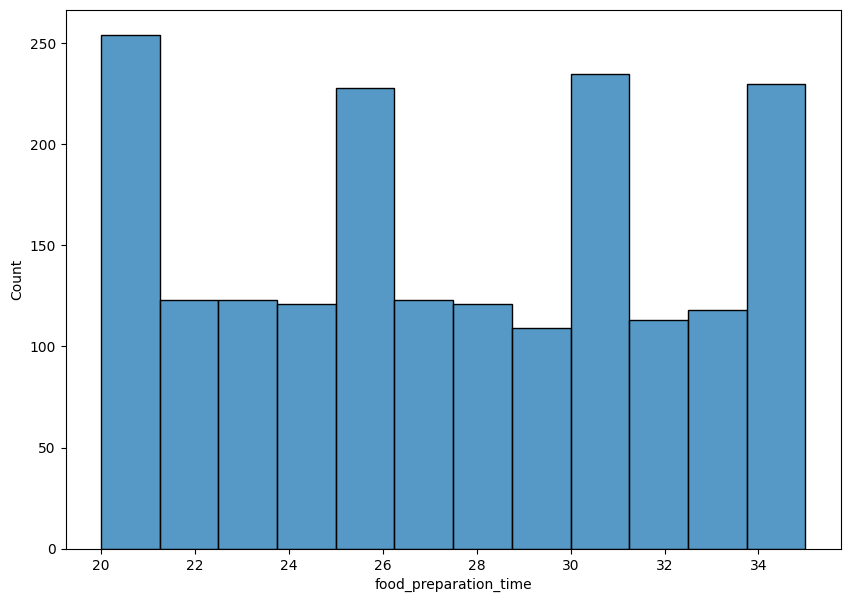

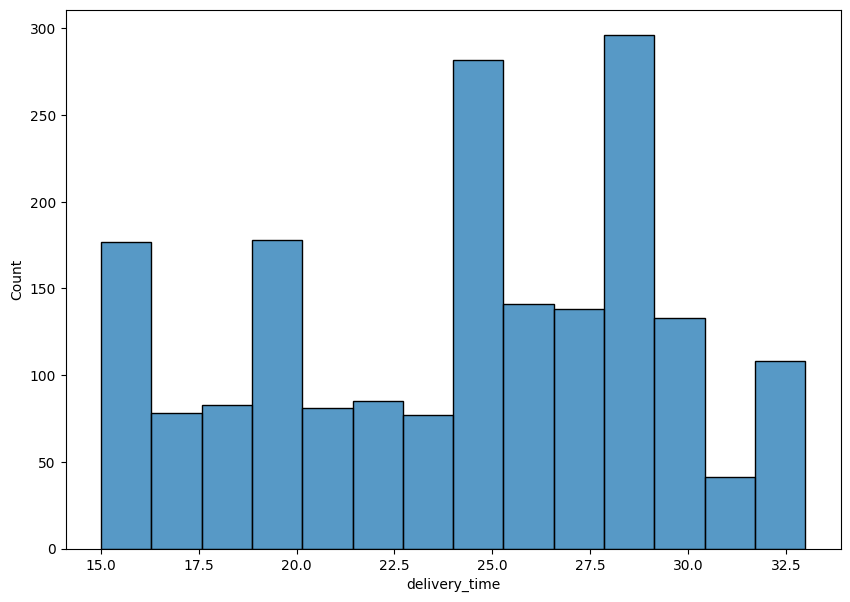

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,7))
sns.histplot(data=df, x='order_id')
plt.show()

plt.figure(figsize=(10,7))
sns.histplot(data=df, x='customer_id')
plt.show()

plt.figure(figsize=(35,7))
sns.histplot(data=df, x='restaurant_name')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20,7))
sns.histplot(data=df, x='cuisine_type')
plt.show()

plt.figure(figsize=(10,7))
sns.histplot(data=df, x='cost_of_the_order')
plt.show()

plt.figure(figsize=(10,7))
sns.histplot(data=df, x='day_of_the_week')
plt.show()

plt.figure(figsize=(10,7))
sns.histplot(data=df, x='rating')
plt.show()

plt.figure(figsize=(10,7))
sns.histplot(data=df, x='food_preparation_time')
plt.show()

plt.figure(figsize=(10,7))
sns.histplot(data=df, x='delivery_time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df['restaurant_name'].value_counts().head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
df['cuisine_type'].mode()[0]

'American'

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
total = (df['cost_of_the_order']>20).sum()
percent = (total/df.shape[0])*100
percent

29.24130663856691

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


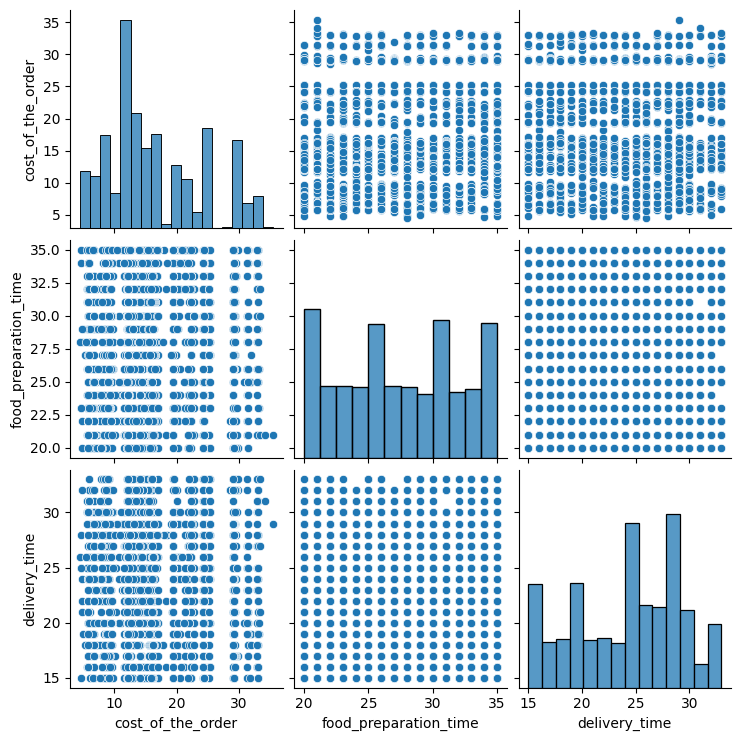

<ipython-input-20-6f6ba2355526>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x="rating", y="cuisine_type", kind='swarm', palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 69.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 38.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-pac

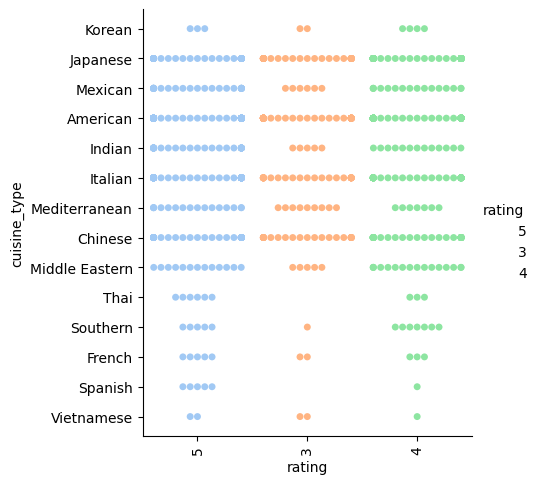

In [ ]:
sns.pairplot(df[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']])
plt.show()

sns.catplot(data=df, x="rating", y="cuisine_type", kind='swarm', palette='pastel')
plt.xticks(rotation=90)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# converts the datatype of rating from object to float
df['rating'] = df['rating'].astype(float)
# rated_restaurants stores the names of restaurants which have actual ratings
rated_restaurants = df[df['rating'].notnull()]
# name of restaurants with their frequency in rated_restaurants
restaurants = rated_restaurants['restaurant_name'].value_counts()
# stores the name of restaurants that have more than 50 ratings
fifty_ratings_restaurants = np.array(restaurants[restaurants > 50].index)
ratings_list = []
for restaurant in fifty_ratings_restaurants:
  mean_value = rated_restaurants[rated_restaurants['restaurant_name']==restaurant]['rating'].mean()
  ratings_list.append(mean_value)

df2 = pd.DataFrame({'Restaurant_name': fifty_ratings_restaurants, 'Average_rating': ratings_list})
df2

,Restaurant_name,Average_rating
0,Shake Shack,4.278195
1,The Meatball Shop,4.511905
2,Blue Ribbon Sushi,4.219178
3,Blue Ribbon Fried Chicken,4.328125


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
def revenue_calculation(cost_of_the_order):
  if cost_of_the_order > 20:
    return cost_of_the_order*0.25
  elif cost_of_the_order > 5:
    return cost_of_the_order*0.15
  else:
    return 0

df['revenue'] = df['cost_of_the_order'].apply(revenue_calculation)

total_revenue = df['revenue'].sum()

print("Total revenue generated by the company is", total_revenue)

Total revenue generated by the company is 6166.303


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['prep_deliver'] = df['food_preparation_time'] + df['delivery_time']
total_count = (df['prep_deliver']>60).sum()
percent_value = (total_count/len(df))*100
print(percent_value, '% of orders take more than 60 minutes to get delivered from the time the order is palced.')

10.537407797681771 % of orders take more than 60 minutes to get delivered from the time the order is palced.


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
weekend_delivery = df[df['day_of_the_week']=='Weekend']
mean_weekend_delivery_time = weekend_delivery['delivery_time'].mean()
weekday_delivery = df[df['day_of_the_week']=='Weekday']
mean_weekday_delivery_time = weekday_delivery['delivery_time'].mean()
print('The mean delivery time on weekend is', mean_weekend_delivery_time)
print('The mean delivery time on weekday is', mean_weekday_delivery_time)

The mean delivery time on weekend is 22.4700222057735
The mean delivery time on weekday is 28.340036563071298


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The company recieves numerous orders both on weekdays and weekends.
*  They have various different cuisine.
*  Many repeat customers.

### Recommendations:

*  The company should decrease the delivery time as the amount of time it takes to cook and deliver few items is 60 minutes.
*  The company should include mendatory rating to get better viewpoint of each restaurant.
*  The company should include the name of the perticular day rather than just marking it as 'weekday' or 'weekend' to get better data and measure the rate of order traffic on which days are high or low

---